# Introductory clustering analyses with Python

This notebook presents k-means and hierarchical clustering analyses for a simple two-dimensional example. Elbow plots and Snake plots are also presented, as well as the visual and cross-tab comparison of the resultant clusters. 

In [1]:
import random
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

%matplotlib inline

random_seed = 77850
np.random.seed(random_seed)
random.seed(random_seed)

# 1. Data Loading and Visualizations

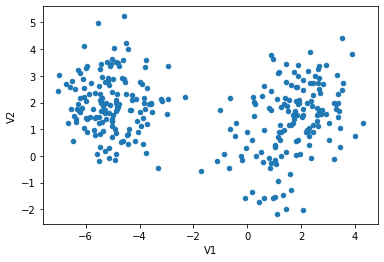

In [2]:
data = pd.read_csv("0910 CSV data -- for clustering.csv", header=None)
data.columns = ['V1', 'V2']
data.plot.scatter(x='V1',y='V2')
plt.show()

# 2. K-Means Clustering

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=50, random_state=random_seed).fit(data)
print("Cluster Centers: \n", kmeans.cluster_centers_)
print("Cluster Labels: \n", kmeans.labels_)

Cluster Centers: 
 [[ 0.66424547 -0.09132968]
 [-5.05567585  1.96991743]
 [ 2.21711129  2.0511069 ]]
Cluster Labels: 
 [2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 0 2 0 0]


In [4]:
from sklearn.cluster import KMeans

### 2.1 Cluster Plot

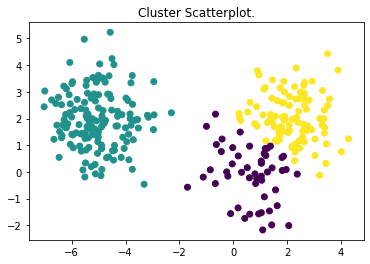

In [5]:
plt.scatter(data['V1'], data['V2'], c=kmeans.labels_)
plt.title("Cluster Scatterplot.")
plt.show()

### 2.2 Initialization matters

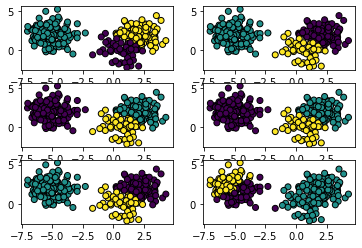

In [6]:
for idx in range(1, 7):
    kmeans_idx = KMeans(n_clusters=3, n_init=1, max_iter=50).fit(data)
    plt.subplot(320 + idx)
    plt.scatter(data['V1'], data['V2'], c=kmeans_idx.labels_, edgecolor='k')
plt.show()

### 2.3 Elbow, or Scree plot

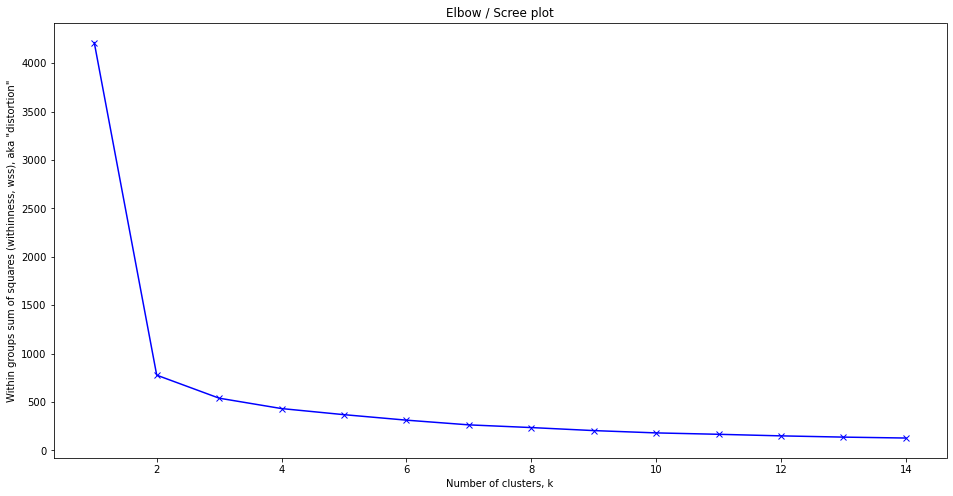

In [7]:
wss = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    wss.append(kmeanModel.inertia_)
    

plt.figure(figsize=(16,8))
plt.plot(K, wss, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Within groups sum of squares (withinness, wss), aka "distortion"')
plt.title('Elbow / Scree plot')
plt.show()

### 2.4 Snake Plot

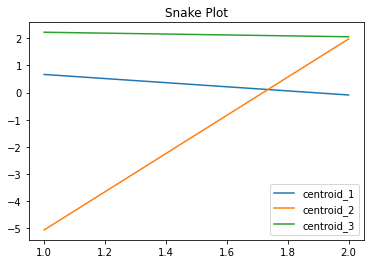

In [8]:
plt.title("Snake Plot")
plt.plot([1, 2], kmeans.cluster_centers_[0], label="centroid_1")
plt.plot([1, 2], kmeans.cluster_centers_[1], label="centroid_2")
plt.plot([1, 2], kmeans.cluster_centers_[2], label="centroid_3")
plt.legend()

plt.show()

### 2.5 Exporting model parameters. New point prediction.

In [9]:
# New point prediction.
cluster_id = kmeans.predict([[0,0]])[0]
print("Point [0, 0] goes to cluster: {}.".format(cluster_id))

Point [0, 0] goes to cluster: 0.


In [10]:
# Export centers.
center_df = pd.DataFrame(kmeans.cluster_centers_)
center_df.columns = data.columns
center_df.to_csv("k-means_centers_py.csv")
# Export clusters.
cluster_df = pd.DataFrame(kmeans.labels_)
cluster_df.to_csv("k-means_clusters_py.csv")

# 3. Hierarchical clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


The function below for dendrogram visualization is copied from the following tutorial: 
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

We would need the function below for colorful scatterplot.

In [13]:
def plt_color(item_list):
    colors=[]
    for entry in item_list:
        if entry==0:
            colors.append('red')
        elif entry==1:
            colors.append('blue')
        elif entry==2:
            colors.append('green')
        else:
            raise ValueError("Unsupported conversion.")
    return colors

Let us plot dendrogram now.

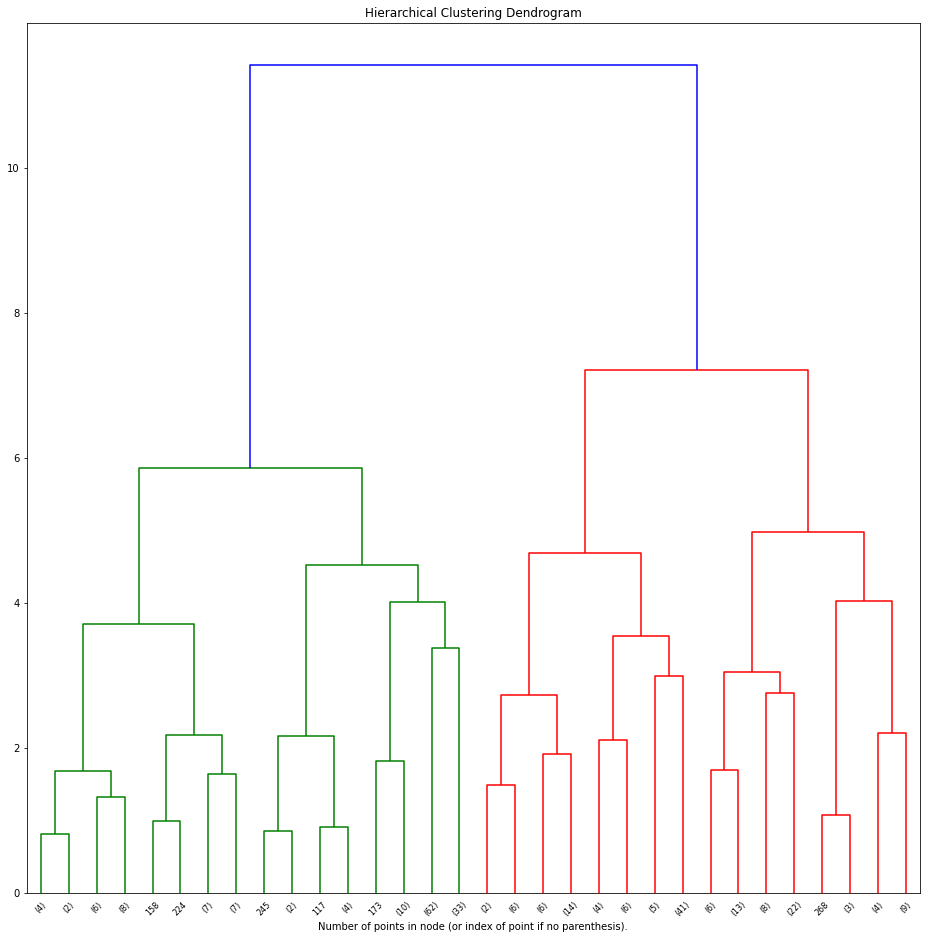

In [14]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete', affinity='euclidean')
model.fit(data)

plt.figure(figsize=(16,16))
plt.title('Hierarchical Clustering Dendrogram')

# Plot the top seven levels of the dendrogram.
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Let us now specify cut on the distance.

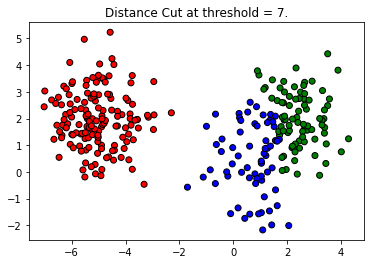

In [15]:
distance_cut = AgglomerativeClustering(
    distance_threshold=7, n_clusters=None, linkage='complete', affinity='euclidean').fit(data)
plt.title("Distance Cut at threshold = 7.")
plt.scatter(data['V1'], data['V2'], c=plt_color(distance_cut.labels_), edgecolor='k')
plt.show()

Alternatively, we may specify cut on the number of clusters.

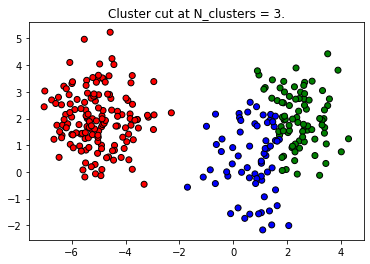

In [16]:
cluster_cut = AgglomerativeClustering(
    distance_threshold=None, n_clusters=3, linkage='complete', affinity='euclidean').fit(data)
plt.title("Cluster cut at N_clusters = 3.")
plt.scatter(data['V1'], data['V2'], c=plt_color(cluster_cut.labels_), edgecolor='k')
plt.show()

# 4. Compare KMeans and Hierarchical Clustering

We begin the comparison by specifying two plots together.

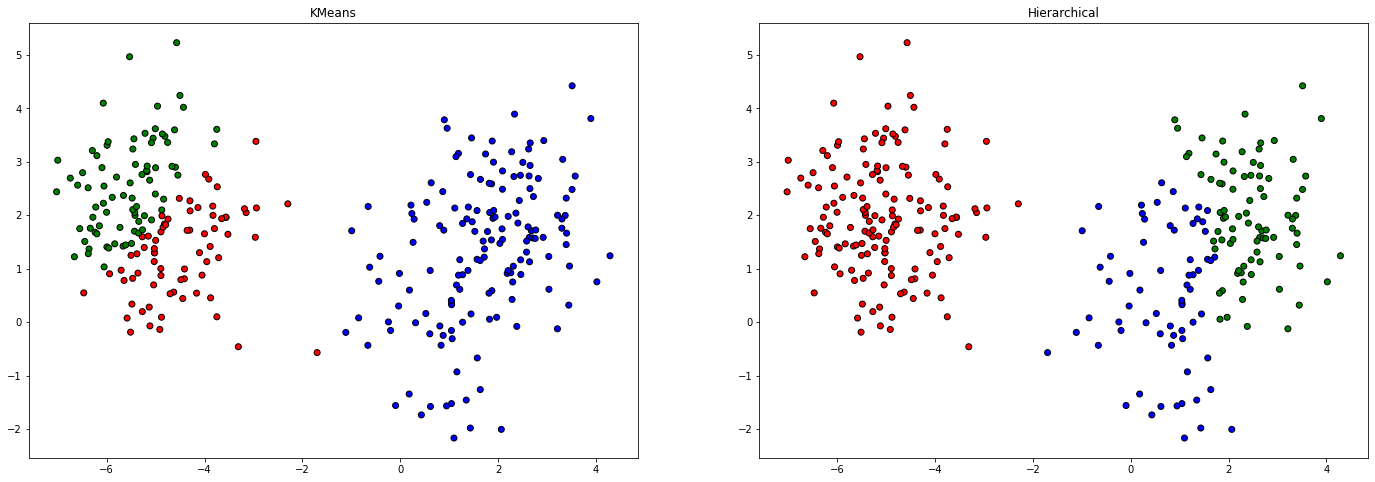

In [17]:
plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.title("KMeans")
plt.scatter(data['V1'], data['V2'], c=plt_color(kmeans_idx.labels_), edgecolor='k')
plt.subplot(122)
plt.title("Hierarchical")
plt.scatter(data['V1'], data['V2'], c=plt_color(cluster_cut.labels_), edgecolor='k')
plt.show()

Crosstab computations.

In [18]:
pd.crosstab(cluster_cut.labels_, cluster_cut.labels_)

col_0,0,1,2
row_0,,,
0,150,0,0
1,0,66,0
2,0,0,84


In [19]:
pd.crosstab(kmeans.labels_, kmeans.labels_)

col_0,0,1,2
row_0,,,
0,52,0,0
1,0,150,0
2,0,0,98


In [20]:
pd.crosstab(cluster_cut.labels_, kmeans.labels_)

col_0,0,1,2
row_0,,,
0,0,150,0
1,47,0,19
2,5,0,79
